<a href="https://colab.research.google.com/github/Ansalgadulu/DataAnalysis/blob/main/Delhivery_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


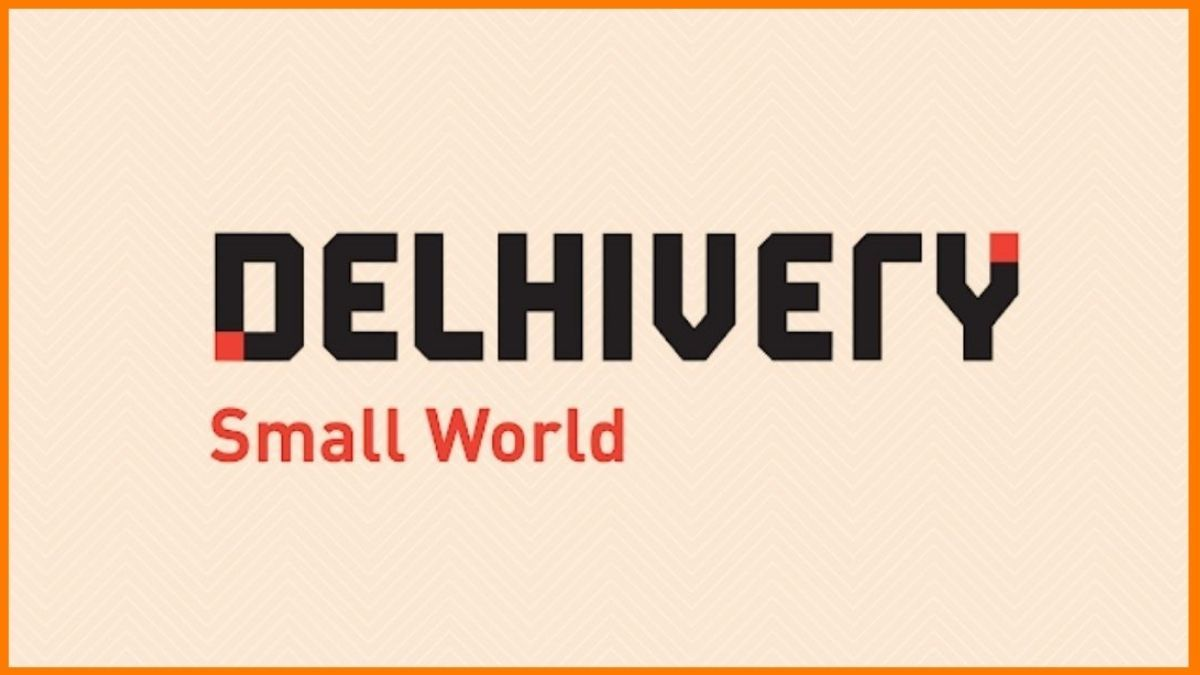

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")
df.head(5)

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

##we have trip level data for all the deliveries each trip can be divided into multiple check points with various check point in between source to destination.

we have the below fields in our data:

1.  data - tells whether the data is testing or training data
2.  trip_creation_time – Timestamp of trip creation
3.  route_schedule_uuid – Unique Id for a particular route schedule
4.  route_type – Transportation type
    1.  FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    2.  Carting: Handling system consisting of small vehicles (carts)
5.  trip_uuid - Unique ID given to a particular trip (A trip may include 8.   different source and destination centers)
6.  source_center - Source ID of trip origin
7.  source_name - Source Name of trip origin
8.  destination_cente – Destination ID
9.  destination_name – Destination Name
10.  od_start_time – Trip start time
11.  od_end_time – Trip end time
12.  start_scan_to_end_scan – Time taken to deliver from source to destination
13.  is_cutoff – Unknown field17.  
14. cutoff_factor – Unknown field1
15.  cutoff_timestamp – Unknown field
16.  actual_distance_to_destination – Distance in Kms between source and destination warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
18. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
19.  factor – Unknown field
20.  segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
21. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
22.  segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
23.  segment_factor – Unknown field

##Merging the rows to bring the data down to trip level with source and destiation of each trip

In [ ]:
#drop the below fields as we dont have much idea what they mean
fields_to_drop=["data","segment_factor","factor","cutoff_timestamp","cutoff_factor","is_cutoff"]
df.drop(fields_to_drop, axis=1,inplace=True)
#converting the below columns to date time
date_columns=["trip_creation_time","od_start_time","od_end_time"]
for i in date_columns:
  df[i] =  pd.to_datetime(df[i], format="%Y/%m/%d")

In [ ]:
#creating a dict to specify aggregation attributes for first level grouping of fields(grouping based on trip id and source as actual distance is a running cumultaive some at centre level)
groupby_dict1={"trip_creation_time":"first","route_schedule_uuid":"first","route_type":"first","source_name":"first","destination_center":"last",
               "destination_name":'last',"od_start_time":"first","od_end_time":"last",
               "start_scan_to_end_scan":"first","actual_distance_to_destination":"last",
               "actual_time":"last",
               "osrm_time":"last",
               "osrm_distance":"last",
               "segment_actual_time":"sum",
               "segment_osrm_time":"sum",
               "segment_osrm_distance":"sum",
               }

groupby_dict2={"trip_creation_time":"first","route_schedule_uuid":"first","route_type":"first","source_center":"first"
    ,"source_name":"first","destination_center":"last",
               "destination_name":'last',"od_start_time":"first","od_end_time":"last",
               "start_scan_to_end_scan":"sum","actual_distance_to_destination":"sum",
               "actual_time":"sum",
               "osrm_time":"sum",
               "osrm_distance":"sum",
               "segment_actual_time":"sum",
               "segment_osrm_time":"sum",
               "segment_osrm_distance":"sum"
               }
#2nd groupby gives us final data on which we can perform our analysis
temp=df.groupby(["trip_uuid","source_center"],sort=False).agg(groupby_dict1).reset_index()
df_final=temp.groupby("trip_uuid").agg(groupby_dict2).reset_index()
df_final.head(5)


trip_uuid         trip_creation_time  \
0  trip-153671041653548748 2018-09-12 00:00:16.535741   
1  trip-153671042288605164 2018-09-12 00:00:22.886430   
2  trip-153671043369099517 2018-09-12 00:00:33.691250   
3  trip-153671046011330457 2018-09-12 00:01:00.113710   
4  trip-153671052974046625 2018-09-12 00:02:09.740725   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
1       Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
2    Bangalore_Nelmngla_H (Karnataka)       IND160002AAC   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583101AAA   

                    destination_name              od_start_time  \
0      Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:16.535741   
1  Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 00:00:22.886430   
2     Chandigarh_Mehmdpur_H (Punjab) 2018-09-12 00:00:33.691250   
3     Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
4             Bellary_Dc (Karnataka) 2018-09-12 00:02:09.740725   

                 od_end_time  start_scan_to_end_scan  \
0 2018-09-13 13:40:23.123744                  2259.0   
1 2018-09-12 03:01:59.598855                   180.0   
2 2018-09-14 17:34:55.442454                  3933.0   
3 2018-09-12 01:41:29.809822                   100.0   
4 2018-09-12 12:00:30.683231                   717.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                      824.732854       1562.0      717.0       991.3523   
1                       73.186911        143.0       68.0        85.1110   
2                     1927.404273       3347.0     1740.0      2354.0665   
3                       17.175274         59.0       15.0        19.6800   
4                      127.448500        341.0      117.0       146.7918   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  
0               1548.0             1008.0              1320.4733  
1                141.0               65.0                84.1894  
2               3308.0             1941.0              2545.2678  
3                 59.0               16.0                19.8766  
4                340.0              115.0               146.7919

#Handling missing values


In [ ]:
df_final.isna().sum()

trip_uuid                          0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

In [ ]:
#dropping rows with missing values as the count is low
df_final.dropna(inplace=True)
df_final.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

#Feature addition:
1.  end_time_minus_start_time=end time - start time
2.  source hub,source state,destination hub,destination state

In [ ]:
#adding feature end_time_minus_start_time
df_final["end_time_minus_start_time"]=((df_final["od_end_time"]-df_final['od_start_time']).dt.total_seconds())/60
df_final.drop(['od_end_time','od_start_time'],axis=1,inplace=True)
df_final

trip_uuid         trip_creation_time  \
0      trip-153671041653548748 2018-09-12 00:00:16.535741   
1      trip-153671042288605164 2018-09-12 00:00:22.886430   
2      trip-153671043369099517 2018-09-12 00:00:33.691250   
3      trip-153671046011330457 2018-09-12 00:01:00.113710   
4      trip-153671052974046625 2018-09-12 00:02:09.740725   
...                        ...                        ...   
14812  trip-153861095625827784 2018-10-03 23:55:56.258533   
14813  trip-153861104386292051 2018-10-03 23:57:23.863155   
14814  trip-153861106442901555 2018-10-03 23:57:44.429324   
14815  trip-153861115439069069 2018-10-03 23:59:14.390954   
14816  trip-153861118270144424 2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
2      thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
4      thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL   
...                                                  ...        ...   
14812  thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...    Carting   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...    Carting   
14814  thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...    Carting   
14815  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
14816  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

      source_center                          source_name destination_center  \
0      IND462022AAA   Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
1      IND572101AAA        Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
2      IND562132AAA     Bangalore_Nelmngla_H (Karnataka)       IND160002AAC   
3      IND400072AAB             Mumbai Hub (Maharashtra)       IND401104AAA   
4      IND583101AAA               Bellary_Dc (Karnataka)       IND583101AAA   
...             ...                                  ...                ...   
14812  IND160002AAC       Chandigarh_Mehmdpur_H (Punjab)       IND160002AAC   
14813  IND121004AAB         FBD_Balabhgarh_DPC (Haryana)       IND121004AAA   
14814  IND209304AAA   Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA   
14815  IND627005AAA  Tirunelveli_VdkkuSrt_I (Tamil Nadu)       IND627005AAA   
14816  IND583201AAA                   Hospet (Karnataka)       IND583101AAA   

                          destination_name  start_scan_to_end_scan  \
0            Gurgaon_Bilaspur_HB (Haryana)                  2259.0   
1        Chikblapur_ShntiSgr_D (Karnataka)                   180.0   
2           Chandigarh_Mehmdpur_H (Punjab)                  3933.0   
3           Mumbai_MiraRd_IP (Maharashtra)                   100.0   
4                   Bellary_Dc (Karnataka)                   717.0   
...                                    ...                     ...   
14812       Chandigarh_Mehmdpur_H (Punjab)                   257.0   
14813       Faridabad_Blbgarh_DC (Haryana)                    60.0   
14814   Kanpur_Central_H_6 (Uttar Pradesh)                   421.0   
14815  Tirunelveli_VdkkuSrt_I (Tamil Nadu)                   347.0   
14816               Bellary_Dc (Karnataka)                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14812                       57.762332         83.0       62.0        73.4630   
14813

In [ ]:
df_final["source_state"]=df_final['source_name'].str.extract('(\(.*\))',expand=True)
df_final["source_hub"]=df_final['source_name'].str.extract('(.+?(?=\())',expand=True)
df_final["destination_hub"]=df_final['destination_name'].str.extract('(.+?(?=\())',expand=True)
df_final["destination_state"]=df_final['destination_name'].str.extract('(\(.*\))',expand=True)
df_final["source_state"]=df_final["source_state"].str.strip("()")
df_final["destination_state"]=df_final["destination_state"].str.strip("()")
df_final

trip_uuid         trip_creation_time  \
0      trip-153671041653548748 2018-09-12 00:00:16.535741   
1      trip-153671042288605164 2018-09-12 00:00:22.886430   
2      trip-153671043369099517 2018-09-12 00:00:33.691250   
3      trip-153671046011330457 2018-09-12 00:01:00.113710   
4      trip-153671052974046625 2018-09-12 00:02:09.740725   
...                        ...                        ...   
14812  trip-153861095625827784 2018-10-03 23:55:56.258533   
14813  trip-153861104386292051 2018-10-03 23:57:23.863155   
14814  trip-153861106442901555 2018-10-03 23:57:44.429324   
14815  trip-153861115439069069 2018-10-03 23:59:14.390954   
14816  trip-153861118270144424 2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
2      thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
4      thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL   
...                                                  ...        ...   
14812  thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...    Carting   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...    Carting   
14814  thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...    Carting   
14815  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
14816  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

      source_center                          source_name destination_center  \
0      IND462022AAA   Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
1      IND572101AAA        Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
2      IND562132AAA     Bangalore_Nelmngla_H (Karnataka)       IND160002AAC   
3      IND400072AAB             Mumbai Hub (Maharashtra)       IND401104AAA   
4      IND583101AAA               Bellary_Dc (Karnataka)       IND583101AAA   
...             ...                                  ...                ...   
14812  IND160002AAC       Chandigarh_Mehmdpur_H (Punjab)       IND160002AAC   
14813  IND121004AAB         FBD_Balabhgarh_DPC (Haryana)       IND121004AAA   
14814  IND209304AAA   Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA   
14815  IND627005AAA  Tirunelveli_VdkkuSrt_I (Tamil Nadu)       IND627005AAA   
14816  IND583201AAA                   Hospet (Karnataka)       IND583101AAA   

                          destination_name  start_scan_to_end_scan  \
0            Gurgaon_Bilaspur_HB (Haryana)                  2259.0   
1        Chikblapur_ShntiSgr_D (Karnataka)                   180.0   
2           Chandigarh_Mehmdpur_H (Punjab)                  3933.0   
3           Mumbai_MiraRd_IP (Maharashtra)                   100.0   
4                   Bellary_Dc (Karnataka)                   717.0   
...                                    ...                     ...   
14812       Chandigarh_Mehmdpur_H (Punjab)                   257.0   
14813       Faridabad_Blbgarh_DC (Haryana)                    60.0   
14814   Kanpur_Central_H_6 (Uttar Pradesh)                   421.0   
14815  Tirunelveli_VdkkuSrt_I (Tamil Nadu)                   347.0   
14816               Bellary_Dc (Karnataka)                   353.0   

       actual_distance_to_destination  ...  osrm_time  osrm_distance  \
0                          824.732854  ...      717.0       991.3523   
1                           73.186911  ...       68.0        85.1110   
2                         1927.404273  ...     1740.0      2354.0665   
3                           17.175274  ...       15.0        19.6800   
4                          127.448500  ...      117.0       146.7918   
...                               ...  ...        ...            ...   
14812                       57.762332  ...       62.0        73.4630   
14813                       15.513784  ...       12.0        16.0882 

In [ ]:
#dropping source name and destination name
df_final.drop(["source_name","destination_name"], axis=1,inplace=True)
df_final

trip_uuid         trip_creation_time  \
0      trip-153671041653548748 2018-09-12 00:00:16.535741   
1      trip-153671042288605164 2018-09-12 00:00:22.886430   
2      trip-153671043369099517 2018-09-12 00:00:33.691250   
3      trip-153671046011330457 2018-09-12 00:01:00.113710   
4      trip-153671052974046625 2018-09-12 00:02:09.740725   
...                        ...                        ...   
14812  trip-153861095625827784 2018-10-03 23:55:56.258533   
14813  trip-153861104386292051 2018-10-03 23:57:23.863155   
14814  trip-153861106442901555 2018-10-03 23:57:44.429324   
14815  trip-153861115439069069 2018-10-03 23:59:14.390954   
14816  trip-153861118270144424 2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
2      thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
4      thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL   
...                                                  ...        ...   
14812  thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...    Carting   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...    Carting   
14814  thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...    Carting   
14815  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
14816  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

      source_center destination_center  start_scan_to_end_scan  \
0      IND462022AAA       IND000000ACB                  2259.0   
1      IND572101AAA       IND562101AAA                   180.0   
2      IND562132AAA       IND160002AAC                  3933.0   
3      IND400072AAB       IND401104AAA                   100.0   
4      IND583101AAA       IND583101AAA                   717.0   
...             ...                ...                     ...   
14812  IND160002AAC       IND160002AAC                   257.0   
14813  IND121004AAB       IND121004AAA                    60.0   
14814  IND209304AAA       IND209304AAA                   421.0   
14815  IND627005AAA       IND627005AAA                   347.0   
14816  IND583201AAA       IND583101AAA                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14812                       57.762332         83.0       62.0        73.4630   
14813                       15.513784         21.0       12.0        16.0882   
14814                       38.684839        282.0       48.0        58.9037   
14815                      134.723836        264.0      179.0       171.1103   
14816                       66.081533        275.0       68.0        80.5787   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14812                 82.0               62.0                64.8551   
14813                 21.0               11.0                16.0883   
14814                281.0       

In [ ]:
month=pd.Series(pd.DatetimeIndex(df_final['trip_creation_time']).month)
df_final['month'] = month
df_final['year'] = pd.DatetimeIndex(df_final['trip_creation_time']).year

# pd.Series(pd.DatetimeIndex(df_final['trip_creation_time']).month)
df_final

trip_uuid         trip_creation_time  \
0      trip-153671041653548748 2018-09-12 00:00:16.535741   
1      trip-153671042288605164 2018-09-12 00:00:22.886430   
2      trip-153671043369099517 2018-09-12 00:00:33.691250   
3      trip-153671046011330457 2018-09-12 00:01:00.113710   
4      trip-153671052974046625 2018-09-12 00:02:09.740725   
...                        ...                        ...   
14812  trip-153861095625827784 2018-10-03 23:55:56.258533   
14813  trip-153861104386292051 2018-10-03 23:57:23.863155   
14814  trip-153861106442901555 2018-10-03 23:57:44.429324   
14815  trip-153861115439069069 2018-10-03 23:59:14.390954   
14816  trip-153861118270144424 2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
2      thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
4      thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL   
...                                                  ...        ...   
14812  thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...    Carting   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...    Carting   
14814  thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...    Carting   
14815  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
14816  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

      source_center destination_center  start_scan_to_end_scan  \
0      IND462022AAA       IND000000ACB                  2259.0   
1      IND572101AAA       IND562101AAA                   180.0   
2      IND562132AAA       IND160002AAC                  3933.0   
3      IND400072AAB       IND401104AAA                   100.0   
4      IND583101AAA       IND583101AAA                   717.0   
...             ...                ...                     ...   
14812  IND160002AAC       IND160002AAC                   257.0   
14813  IND121004AAB       IND121004AAA                    60.0   
14814  IND209304AAA       IND209304AAA                   421.0   
14815  IND627005AAA       IND627005AAA                   347.0   
14816  IND583201AAA       IND583101AAA                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  ...  \
0                          824.732854       1562.0      717.0  ...   
1                           73.186911        143.0       68.0  ...   
2                         1927.404273       3347.0     1740.0  ...   
3                           17.175274         59.0       15.0  ...   
4                          127.448500        341.0      117.0  ...   
...                               ...          ...        ...  ...   
14812                       57.762332         83.0       62.0  ...   
14813                       15.513784         21.0       12.0  ...   
14814                       38.684839        282.0       48.0  ...   
14815                      134.723836        264.0      179.0  ...   
14816                       66.081533        275.0       68.0  ...   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14812                 82.0               62.0                64.8551   
14813                 21.0               11.0                16.0883   
14814                281.0               88.0               104.8866   
14815                258.0              221.0               223.5324   
14816    

In [ ]:
df_final.fillna(10,inplace=True)


In [ ]:
#Rearranging the data in proper order
df_final=df_final[["trip_uuid","trip_creation_time","year","month","route_schedule_uuid","route_type","source_center","source_state","source_hub","destination_center","destination_state","destination_hub","start_scan_to_end_scan","end_time_minus_start_time","actual_time","osrm_time","segment_actual_time","segment_osrm_time","actual_distance_to_destination","osrm_distance","segment_osrm_distance"]]


In [ ]:
df_final.describe()

year         month  start_scan_to_end_scan  \
count  14800.0  14800.000000            14800.000000   
mean    2018.0      9.120878              528.898041   
std        0.0      0.325997              656.257164   
min     2018.0      9.000000               23.000000   
25%     2018.0      9.000000              149.000000   
50%     2018.0      9.000000              279.000000   
75%     2018.0      9.000000              633.000000   
max     2018.0     10.000000             7898.000000   

       end_time_minus_start_time   actual_time     osrm_time  \
count               14800.000000  14800.000000  14800.000000   
mean                  545.962002    356.943851    161.306014   
std                   666.764647    561.206386    271.343982   
min                    23.461468      9.000000      6.000000   
25%                   151.048443     67.000000     29.000000   
50%                   288.241140    149.000000     60.000000   
75%                   672.119011    369.000000    168.000000   
max                  7898.551955   6265.000000   2032.000000   

       segment_actual_time  segment_osrm_time  actual_distance_to_destination  \
count         14800.000000       14800.000000                    14800.000000   
mean            354.028919         181.056284                      164.406921   
std             556.443324         314.703250                      305.352481   
min               9.000000           6.000000                        9.002461   
25%              66.000000          30.000000                       22.786366   
50%             147.000000          65.000000                       48.431259   
75%             367.000000         185.000000                      164.223814   
max            6230.000000        2564.000000                     2186.531787   

       osrm_distance  segment_osrm_distance  
count   14800.000000           14800.000000  
mean      204.269543             223.341203  
std       370.383888             416.842088  
min         9.072900               9.072900  
25%        30.775025              32.617700  
50%        65.543300              70.113450  
75%       208.085675             218.917675  
max      2840.081000            3523.632400

In [ ]:
#lets check the date range for the data
df_final['trip_creation_time'].max()-df_final['trip_creation_time'].min()

Timedelta('21 days 23:59:26.165951')

We can see that the range of dates available in our data all span within 21 days

##Univariate Analysis

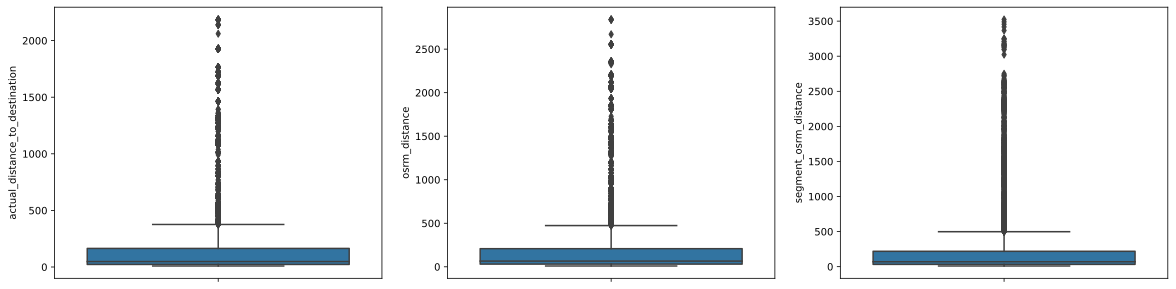

In [ ]:
#boxplots to check for outliers in
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
plt.subplot(131)
sns.boxplot(y=df_final["actual_distance_to_destination"])
plt.subplot(132)
sns.boxplot(y=df_final["osrm_distance"])
plt.subplot(133)
sns.boxplot(y=df_final["segment_osrm_distance"])
plt.show()


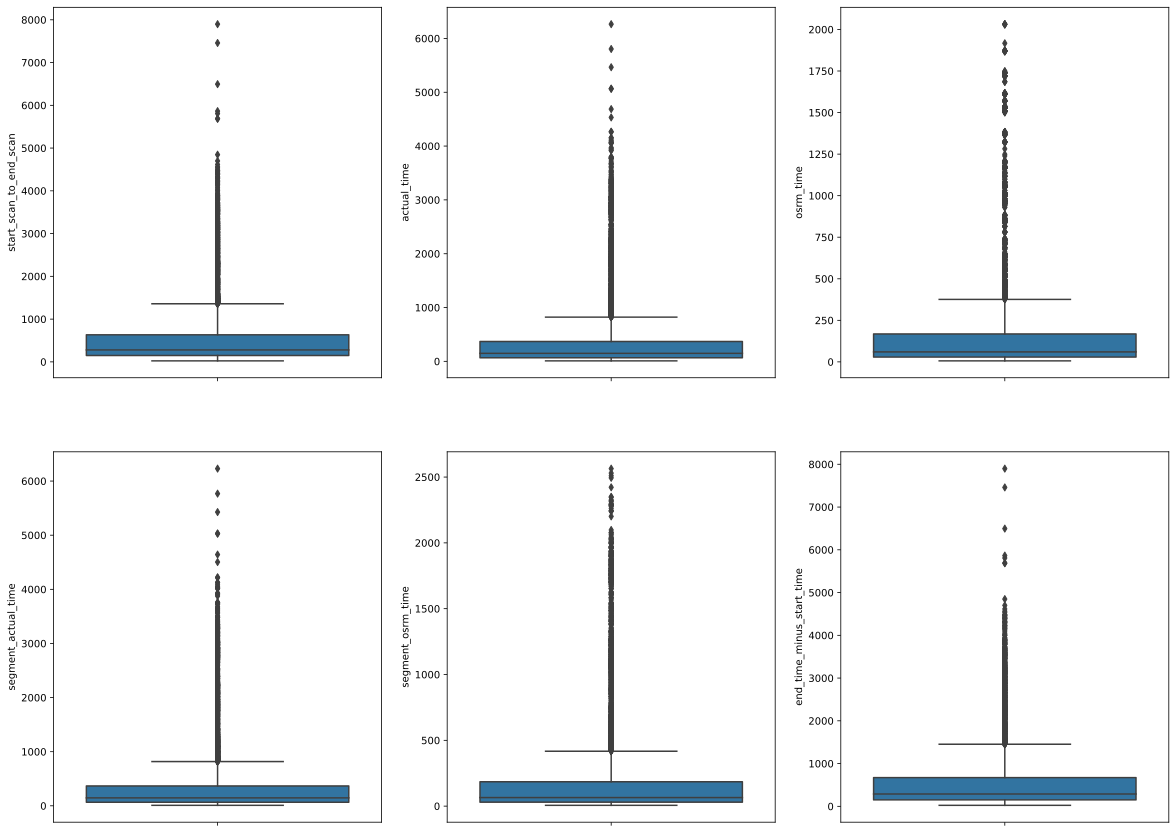

In [ ]:
#boxplots to check for outliers in
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
plt.subplot(231)
sns.boxplot(y=df_final["start_scan_to_end_scan"])
plt.subplot(232)
sns.boxplot(y=df_final["actual_time"])
plt.subplot(233)
sns.boxplot(y=df_final["osrm_time"])
plt.subplot(234)
sns.boxplot(y=df_final["segment_actual_time"])
plt.subplot(235)
sns.boxplot(y=df_final["segment_osrm_time"])
plt.subplot(236)
sns.boxplot(y=df_final["end_time_minus_start_time"])
plt.show()

We can see that all of the columns have significant outliers but it is also seen that its right skewed and converting it to a logdistribution takes most of them into a closely normal disribution

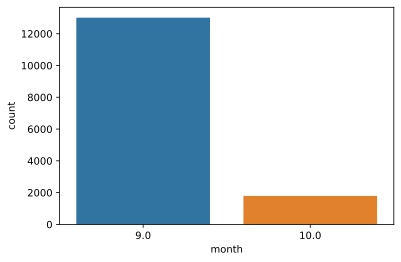

In [ ]:
#month wise trip distribution
sns.countplot(x=df_final['month'])
#the data that we have is only for 21 DAYS so we cannot say that the below data is true for the whole two months

In [ ]:
df_final.describe()

year         month  start_scan_to_end_scan  \
count  14800.0  14800.000000            14800.000000   
mean    2018.0      9.120878              528.898041   
std        0.0      0.325997              656.257164   
min     2018.0      9.000000               23.000000   
25%     2018.0      9.000000              149.000000   
50%     2018.0      9.000000              279.000000   
75%     2018.0      9.000000              633.000000   
max     2018.0     10.000000             7898.000000   

       end_time_minus_start_time   actual_time     osrm_time  \
count               14800.000000  14800.000000  14800.000000   
mean                  545.962002    356.943851    161.306014   
std                   666.764647    561.206386    271.343982   
min                    23.461468      9.000000      6.000000   
25%                   151.048443     67.000000     29.000000   
50%                   288.241140    149.000000     60.000000   
75%                   672.119011    369.000000    168.000000   
max                  7898.551955   6265.000000   2032.000000   

       segment_actual_time  segment_osrm_time  actual_distance_to_destination  \
count         14800.000000       14800.000000                    14800.000000   
mean            354.028919         181.056284                      164.406921   
std             556.443324         314.703250                      305.352481   
min               9.000000           6.000000                        9.002461   
25%              66.000000          30.000000                       22.786366   
50%             147.000000          65.000000                       48.431259   
75%             367.000000         185.000000                      164.223814   
max            6230.000000        2564.000000                     2186.531787   

       osrm_distance  segment_osrm_distance  
count   14800.000000           14800.000000  
mean      204.269543             223.341203  
std       370.383888             416.842088  
min         9.072900               9.072900  
25%        30.775025              32.617700  
50%        65.543300              70.113450  
75%       208.085675             218.917675  
max      2840.081000            3523.632400

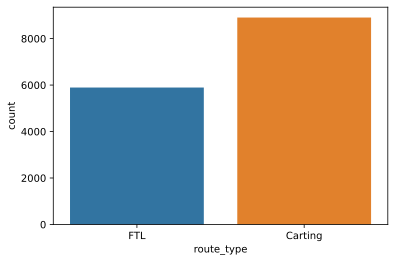

In [ ]:
#based on route-type
sns.countplot(x=df_final["route_type"])
plt.show()


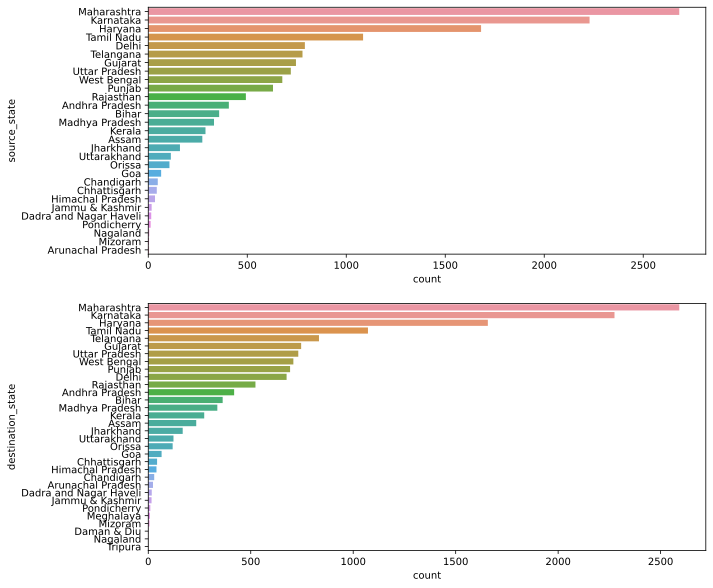

In [ ]:
#state wise trip distibution
fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plt.subplot(211)
large_to_small_source = df_final.groupby('source_state').size().sort_values().index[::-1]
sns.countplot(y=df_final["source_state"],order=large_to_small_source)
plt.subplot(212)
large_to_small_destination = df_final.groupby('destination_state').size().sort_values().index[::-1]
sns.countplot(y=df_final["destination_state"],order=large_to_small_destination)
plt.show()


In [ ]:
large_to_small_hub

MultiIndex([('Chandigarh_Mehmdpur_H ', 'Chandigarh_Mehmdpur_H '),
            ( 'Bangalore_Nelmngla_H ', 'Bengaluru_KGAirprt_HB '),
            (  'Muzaffrpur_Bbganj_I ',   'Muzaffrpur_Bbganj_I '),
            ('Bengaluru_Bomsndra_HB ', 'Bengaluru_KGAirprt_HB '),
            (  'Bhiwandi_Mankoli_HB ',   'Bhiwandi_Mankoli_HB '),
            ('Bengaluru_KGAirprt_HB ',  'Bangalore_Nelmngla_H '),
            (   'Ahmedabad_East_H_1 ',    'Ahmedabad_East_H_1 '),
            (  'Bhiwandi_Mankoli_HB ',            'Mumbai Hub '),
            (   'Mumbai_Chndivli_PC ',   'Bhiwandi_Mankoli_HB '),
            ( 'Bangalore_Nelmngla_H ', 'Bengaluru_Bomsndra_HB '),
            ...
            (      'Delhi_Airport_H ',      'Noida_Sector02_C '),
            (    'Rampur_RoshnBgh_I ',      'Aonla_KdidmCLY_D '),
            (      'Delhi_Airport_H ',               'NOI_RPC '),
            (    'Rampur_RoshnBgh_I ',              'Bareilly '),
            (      'Delhi_Airport_H ',    'Lucknow_Pandriba_

##Bivariate Analysis

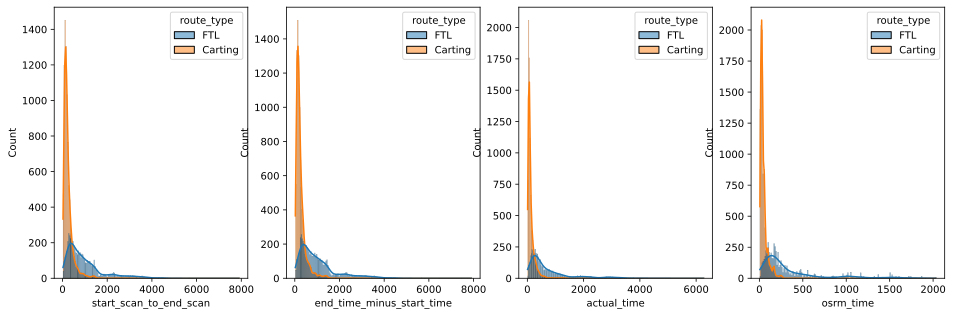

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))
plt.subplot(141)
sns.histplot(data=df_final, x="start_scan_to_end_scan", hue="route_type",kde=True)
plt.subplot(142)
sns.histplot(data=df_final, x="end_time_minus_start_time", hue="route_type",kde=True)
plt.subplot(143)
sns.histplot(data=df_final, x="actual_time", hue="route_type",kde=True)
plt.subplot(144)
sns.histplot(data=df_final, x="osrm_time", hue="route_type",kde=True)

plt.show()




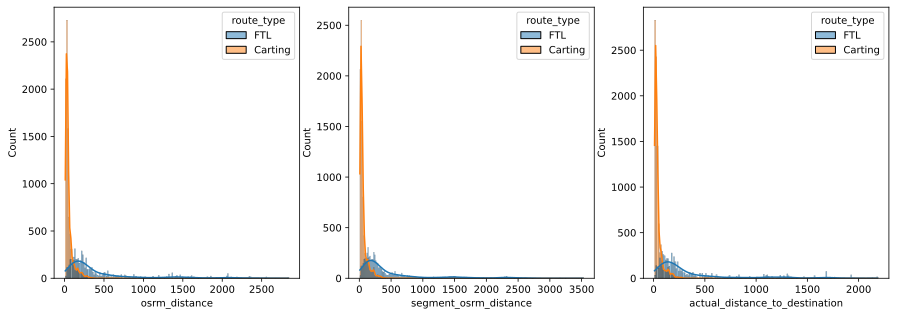

In [ ]:
#Comparing the distances
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=df_final, x="osrm_distance", hue="route_type",kde=True)
plt.subplot(132)
sns.histplot(data=df_final, x="segment_osrm_distance", hue="route_type",kde=True)
plt.subplot(133)
sns.histplot(data=df_final, x="actual_distance_to_destination", hue="route_type",kde=True)
plt.show()

From the above comparison we can draw the conclusion that the distances and times for carting are much lesser as compared to FTL

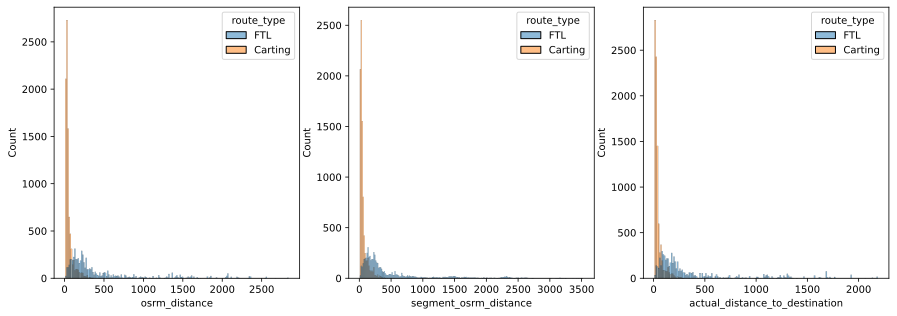

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=df_final, x="osrm_distance", hue="route_type")
plt.subplot(132)
sns.histplot(data=df_final, x="segment_osrm_distance", hue="route_type")
plt.subplot(133)
sns.histplot(data=df_final, x="actual_distance_to_destination", hue="route_type")
plt.show()

In [ ]:
import random

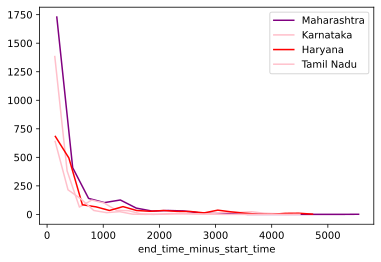

In [ ]:
#Lets make line charts for top 4 states and compare the values for each column
for i in ['Maharashtra',"Karnataka","Haryana","Tamil Nadu"]:
  y, binEdges = np.histogram(df_final[df_final['source_state']==i]['end_time_minus_start_time'], bins=20)
  bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
  plt.plot(bincenters, y, '-',label=i, c=random.choice(['red','green','blue',"black",'purple',"pink",'orange']))
plt.xlabel("end_time_minus_start_time")
plt.legend()
plt.show()

**We can see that it follows the same trend as the rankings we saw earlier**

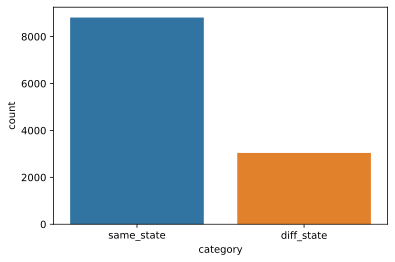

In [ ]:
#lets check the difference in count of interstate and samestate orders
same_state=non_returned[non_returned['source_state']==non_returned["destination_state"]]
diff_state=non_returned[non_returned['source_state']!=non_returned["destination_state"]]
temp1=pd.DataFrame({"category":["same_state","diff_state"], 'count':[len(same_state),len(diff_state)]})
sns.barplot(y="count",x="category",data=temp1)
plt.show()

##we  can see that there are more same state deliveries(8000+) as compared to 3000 around in diff_states

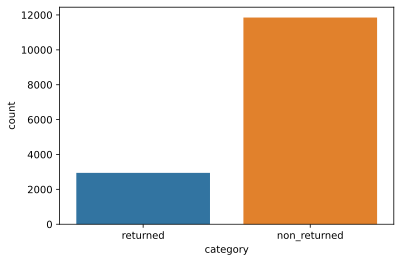

In [ ]:
#lets check for returns
returned=df_final[df_final['source_hub']==df_final["destination_hub"]]
non_returned=df_final[df_final['source_hub']!=df_final["destination_hub"]]
temp2=pd.DataFrame({"category":["returned","non_returned"], 'count':[len(returned),len(non_returned)]})
sns.barplot(y="count",x="category",data=temp2)
plt.show()

##around 2000+ orders are returned

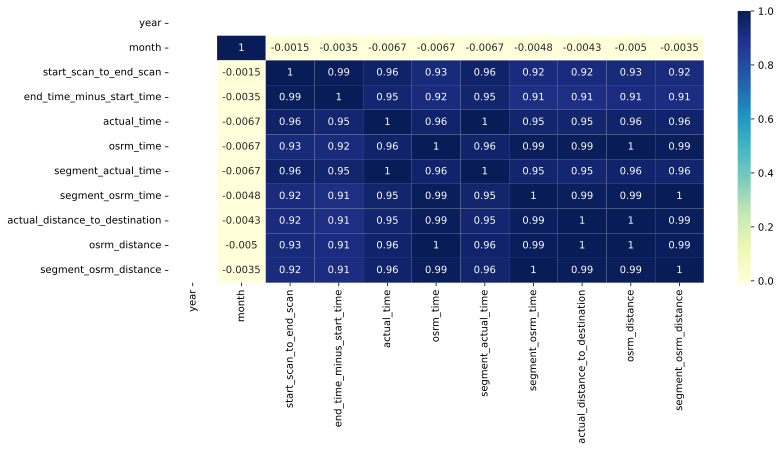

In [ ]:
#the below shows correlation with various columns of our data
fig= plt.subplots(figsize=(12, 5))
dataplot = sns.heatmap(df_final.corr(), cmap="YlGnBu", annot=True)
plt.show()

**There is strong correlation between most of the time and distance fields (90<) lets check somecombinations to to find some insights**

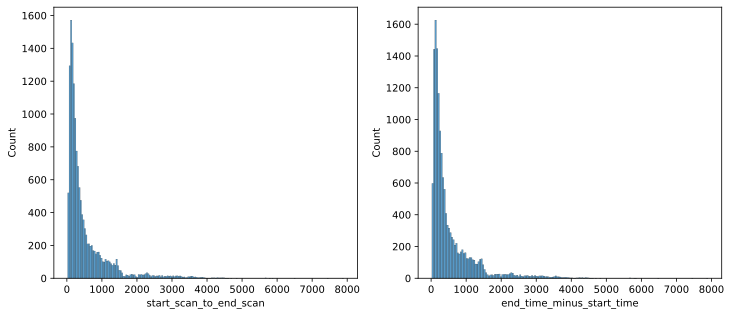

In [ ]:
#Comparing the difference between Point end_time-start_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplot(121)
sns.histplot(x=df_final["start_scan_to_end_scan"])
plt.subplot(122)
sns.histplot(x=df_final['end_time_minus_start_time'])
plt.show()

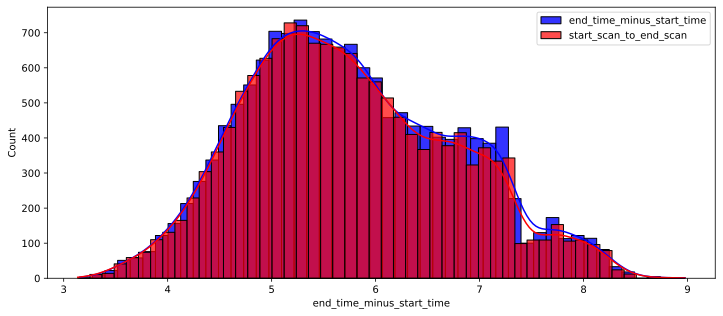

In [ ]:
#using log as this is  right skewed data
fig= plt.subplots(figsize=(12, 5))
sns.histplot(x=np.log(df_final['end_time_minus_start_time']),label="end_time_minus_start_time",alpha=0.8, color="blue",kde=True)
sns.histplot(x=np.log(df_final['start_scan_to_end_scan']),label="start_scan_to_end_scan",alpha=0.7, color="red",kde=True)
plt.legend()
plt.show()
#We can see that the below 2 columns are almost similar and have a correlation of 0.99

In [ ]:
alpha=0.05
def P_value(y,x):
  if x<alpha:
    print("reject NULL hypothesis")
  else :
    print("fail to reject Null hypothesis")

In [ ]:
#we can use ttest to compare both the fields
#H0:end_time_minus_start_time is independent from start_scan_to_end_scan
#HA:they are dependent and end_time_minus_start_time is greater


P_value(*stats.ttest_ind(df_final["end_time_minus_start_time"],df_final['start_scan_to_end_scan'],alternative="greater"))

reject NULL hypothesis


 the above fileds aredependent and end_time_minus_start_time is greater

##comparing actual_time aggregated value and OSRM time aggregated value

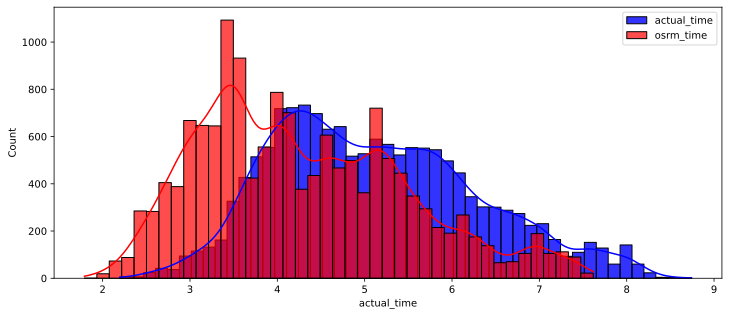

In [ ]:
#using log as this is  right skewed data
fig= plt.subplots(figsize=(12, 5))
sns.histplot(x=np.log(df_final['actual_time']),label="actual_time",alpha=0.8, color="blue",kde=True)
sns.histplot(x=np.log(df_final['osrm_time']),label="osrm_time",alpha=0.7, color="red",kde=True)
plt.legend()
plt.show()
#We can see that the below 2 columns are almost similar and have a correlation of 0.96

In [ ]:
#we can use ttest to compare both the fields
#H0:osrm_time is same as actual_time
#HA:they are different and actual_time is greater


P_value(*stats.ttest_ind(df_final["actual_time"],df_final['osrm_time'],alternative="greater"))

reject NULL hypothesis


from the above test We can say that the actual time is dependent on osrm time and significantly greater than osrm time

##Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

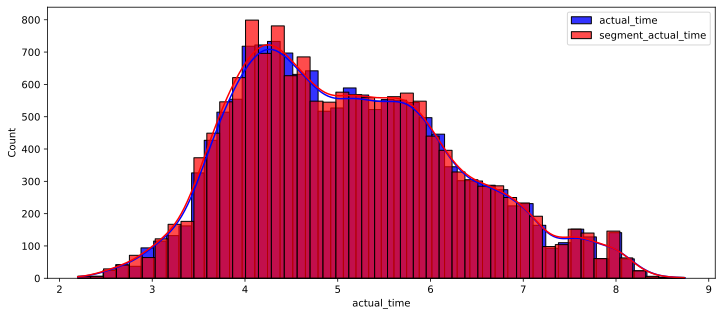

In [ ]:
#using log as this is  right skewed data
fig= plt.subplots(figsize=(12, 5))
sns.histplot(x=np.log(df_final['actual_time']),label="actual_time",alpha=0.8, color="blue",kde=True)
sns.histplot(x=np.log(df_final['segment_actual_time']),label="segment_actual_time",alpha=0.7, color="red",kde=True)
plt.legend()
plt.show()
#We can see that the below 2 columns are almost similar and have a correlation of 1.0

In [ ]:
#we can use ttest to compare both the fields
#H0:osrm_time and actual_time have same mean
#HA:they are different and actual_time is independent


P_value(*stats.ttest_ind(df_final["actual_time"],df_final['osrm_time']))

reject NULL hypothesis


**we can conlude that both the variables are independent of each other**

##Comparing osrm distance aggregated value and segment osrm distance aggregated value

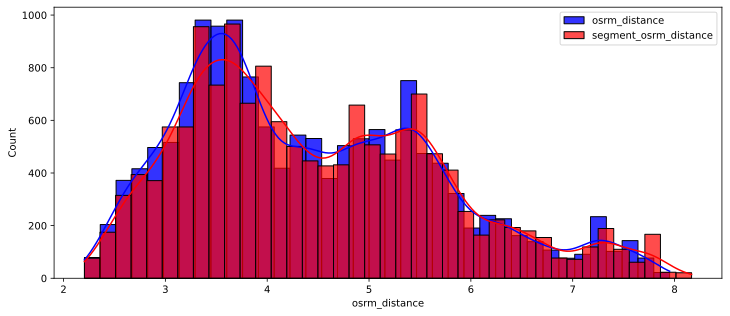

In [ ]:
#using log as this is  right skewed data
fig= plt.subplots(figsize=(12, 5))
sns.histplot(x=np.log(df_final['osrm_distance']),label="osrm_distance",alpha=0.8, color="blue",kde=True)
sns.histplot(x=np.log(df_final['segment_osrm_distance']),label="segment_osrm_distance",alpha=0.7, color="red",kde=True)
plt.legend()
plt.show()
#We can see that the below 2 columns are almost similar and have a correlation of 0.95

In [ ]:
#we can use ttest to compare both the fields
#H0:segment_osrm_distance is same mean as compared to osrm_distance
#HA:they are different and osrm_distance is indpendent of segment_osrm_distance


P_value(*stats.ttest_ind(df_final["osrm_distance"],df_final['segment_osrm_distance'],alternative="less"))

reject NULL hypothesis


**The conclusion from the above test is segment aggregated osrm distance is greater than osrm distance**
